In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import spacy
from spacy.language import Language
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_md')

from eda import *

In [2]:
f_path = '/Users/christineegan/flatiron-capstone/data/processed/fb_5k/labeled/'
f1 = 'fb_5k_lib_lab.csv'
f2 = 'fb_5k_con_lab.csv'
data = process_data(load_data(f_path, f1, f2))

I performed undersampling when I selected my samples, so I am starting with a balanced data set.

In [3]:
data['label'].value_counts()

Conservative    5000
Liberal         5000
Name: label, dtype: int64

### Polarity

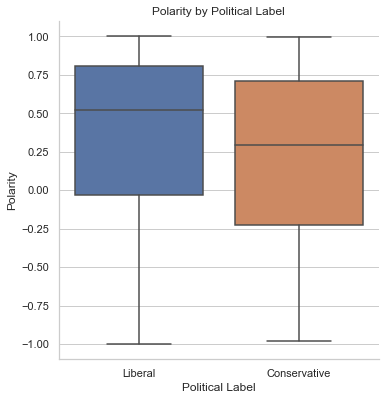

In [4]:
pol_dist_by_label(data)

### Polarity, Message Length, and Label

In [5]:
data['lens'].describe()

count    10000.000000
mean       323.577400
std        613.812666
min          7.000000
25%        144.000000
50%        234.500000
75%        359.000000
max      10075.000000
Name: lens, dtype: float64

Most of the observations have a length that is less than 360 words. However, there are still a number of observations that have many more words. With a standard deviation of 613, we could use 1000 boundary to classify long vs short documents. Long documents being those with a word count at least one std greater than the mean.

In [6]:
short, long =  ad_length_stats(data, 1000)

Facebook Ad Length
98.38% of ads are short
1.62% of ads are long

50.75% of short ads are conservative
49.25% of short ads are liberal

4.32% of long ads are conservative
95.68% of long ads are liberal



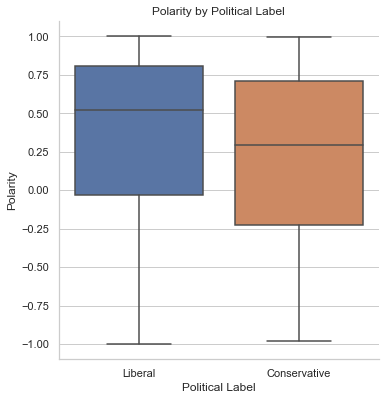

In [7]:
pol_dist_by_label(data)

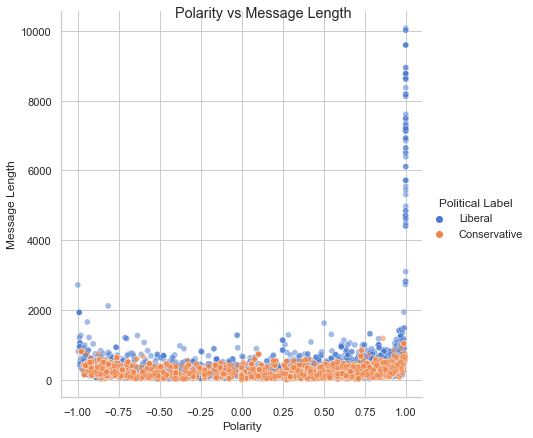

In [8]:
pol_len_by_label(data)

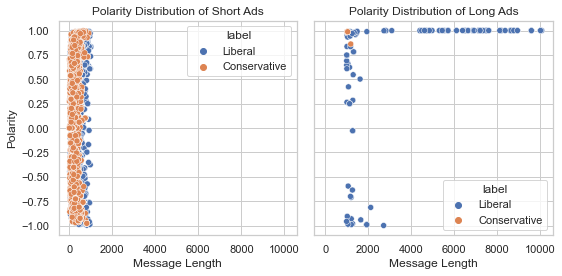

In [9]:
pol_by_len_dbl(short, long)